In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Predicting Medical Appointment No Shows
Dataset from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments/version/3/home)

In [45]:
raw_data = pd.read_csv("KaggleV2-May-2016.csv")
raw_data.columns = ["patient_id", "appointment_id", "gender", "scheduled_day", "appointment_day",
                   "age", "neighborhood", "scholarship", "hypertension", "diabetes", "alcoholism",
                   "handicap", "sms_received", "no_show"]
print("Rows: {}\nColumns: {}".format(raw_data.shape[0], raw_data.shape[1]))
raw_data.head()

Rows: 110527
Columns: 14


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [46]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [47]:
raw_data.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighborhood       0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

### No-show: the prediction target

In [48]:
raw_data["no_show"].describe()

count     110527
unique         2
top           No
freq       88208
Name: no_show, dtype: object

In [49]:
raw_data["no_show"].value_counts(normalize=True)

No     0.798067
Yes    0.201933
Name: no_show, dtype: float64

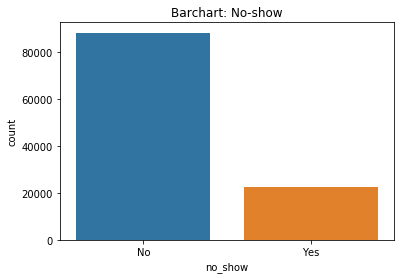

In [50]:
s = sns.countplot("no_show", data=raw_data)
s.set_title("Barchart: No-show")
plt.show()

### Gender

In [51]:
raw_data["gender"].describe()

count     110527
unique         2
top            F
freq       71840
Name: gender, dtype: object

In [52]:
raw_data["gender"].value_counts(normalize=True)

F    0.649977
M    0.350023
Name: gender, dtype: float64

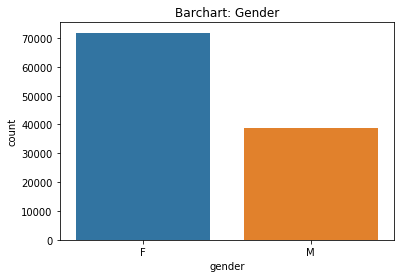

In [53]:
s = sns.countplot("gender", data=raw_data)
s.set_title("Barchart: Gender")
plt.show()

### Age

In [54]:
raw_data["age"].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [55]:
raw_data["age"] = raw_data["age"].apply(lambda x: np.nan if (x < 0) | (x == 115) else x)

In [56]:
print(raw_data.shape)
raw_data.dropna(axis=0, inplace=True)
print(raw_data.shape)

(110527, 14)
(110521, 14)


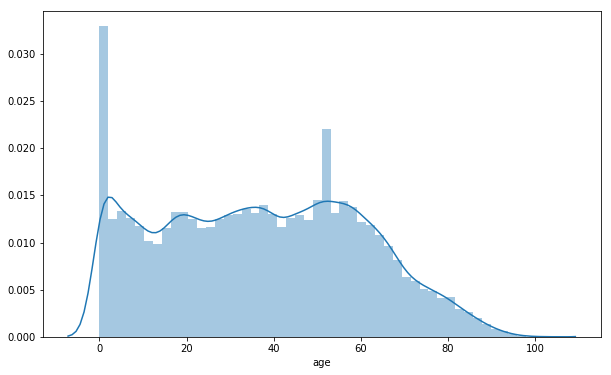

In [57]:
fig = plt.figure(figsize=(10, 6))
s = sns.distplot(raw_data["age"])
plt.show()

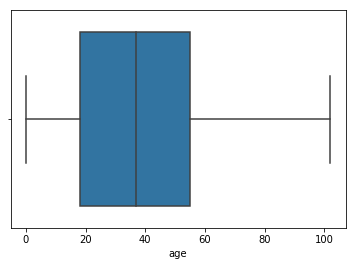

In [59]:
sns.boxplot(x="age", data=raw_data)
plt.show()

### Neighborhood

In [60]:
raw_data["neighborhood"].describe()

count             110521
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighborhood, dtype: object

In [62]:
raw_data["neighborhood"].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2258
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1976
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

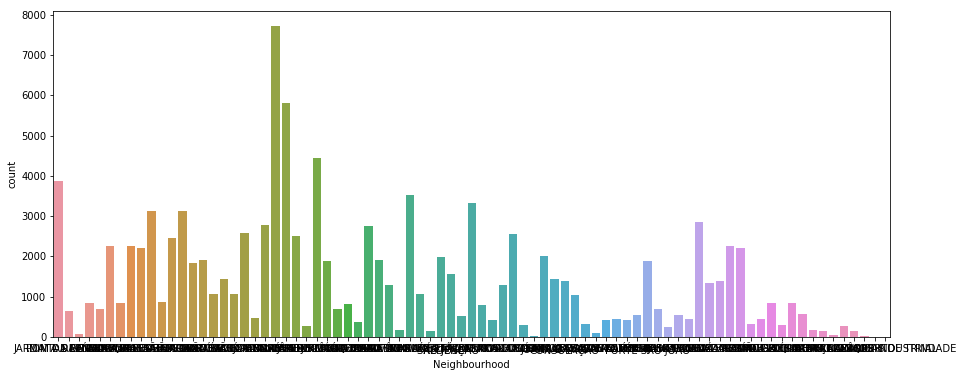

In [17]:
fig = plt.figure(figsize=(15, 6))
s = sns.countplot("Neighbourhood", data=raw_data)
plt.show()

### Scholarship

In [63]:
raw_data["scholarship"].describe()

count    110521.000000
mean          0.098271
std           0.297682
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: scholarship, dtype: float64

In [64]:
raw_data["scholarship"].value_counts()

0    99660
1    10861
Name: scholarship, dtype: int64

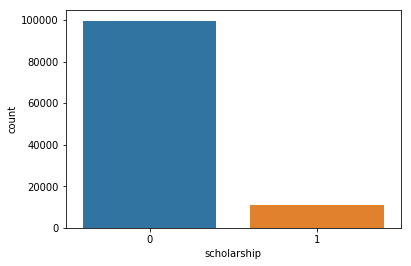

In [65]:
s = sns.countplot("scholarship", data=raw_data)
plt.show()

### Hypertension

In [66]:
raw_data["hypertension"].describe()

count    110521.000000
mean          0.197248
std           0.397923
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: hypertension, dtype: float64

In [67]:
raw_data["hypertension"].value_counts()

0    88721
1    21800
Name: hypertension, dtype: int64

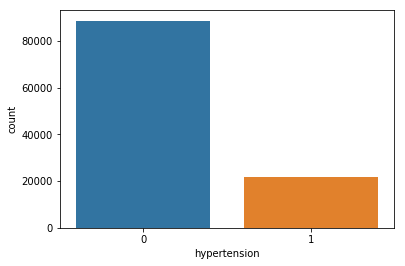

In [68]:
s = sns.countplot("hypertension", data=raw_data)
plt.show()

### Diabetes

In [69]:
raw_data["diabetes"].describe()

count    110521.000000
mean          0.071869
std           0.258272
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diabetes, dtype: float64

In [70]:
raw_data["diabetes"].value_counts()

0    102578
1      7943
Name: diabetes, dtype: int64

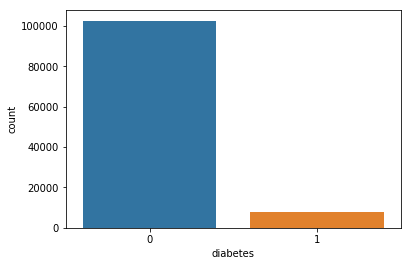

In [71]:
s = sns.countplot("diabetes", data=raw_data)
plt.show()

### Alcoholism

In [72]:
raw_data["alcoholism"].describe()

count    110521.000000
mean          0.030401
std           0.171690
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: alcoholism, dtype: float64

In [73]:
raw_data["alcoholism"].value_counts()

0    107161
1      3360
Name: alcoholism, dtype: int64

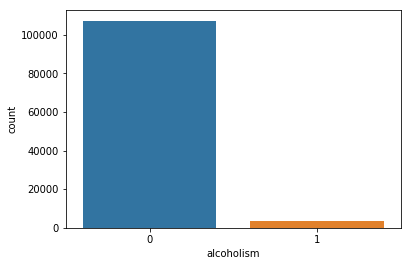

In [74]:
s = sns.countplot("alcoholism", data=raw_data)
plt.show()

### Handicap

In [75]:
raw_data["handicap"].describe()

count    110521.000000
mean          0.022213
std           0.161440
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: handicap, dtype: float64

In [76]:
raw_data["handicap"].value_counts()

0    108284
1      2038
2       183
3        13
4         3
Name: handicap, dtype: int64

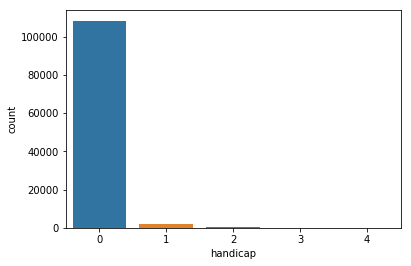

In [77]:
s = sns.countplot("handicap", data=raw_data)
plt.show()

### SMS received

In [78]:
raw_data["sms_received"].describe()

count    110521.000000
mean          0.321034
std           0.466876
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: sms_received, dtype: float64

In [79]:
raw_data["sms_received"].value_counts(normalize=True)

0    0.678966
1    0.321034
Name: sms_received, dtype: float64

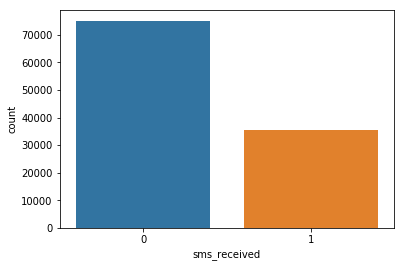

In [80]:
s = sns.countplot("sms_received", data=raw_data)
plt.show()

In [102]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110521 non-null float64
appointment_id     110521 non-null int64
gender             110521 non-null object
scheduled_day      110521 non-null object
appointment_day    110521 non-null object
age                110521 non-null float64
neighborhood       110521 non-null object
scholarship        110521 non-null int64
hypertension       110521 non-null int64
diabetes           110521 non-null int64
alcoholism         110521 non-null int64
handicap           110521 non-null int64
sms_received       110521 non-null int64
no_show            110521 non-null object
dtypes: float64(2), int64(7), object(5)
memory usage: 17.6+ MB


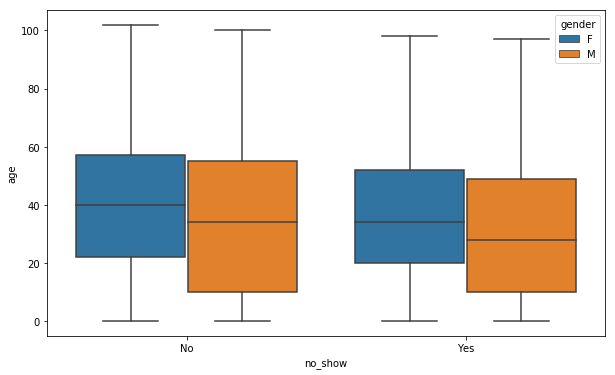

In [82]:
fig = plt.figure(figsize=(10, 6))
s = sns.boxplot(x="no_show", y="age", hue="gender", data=raw_data )
plt.show()

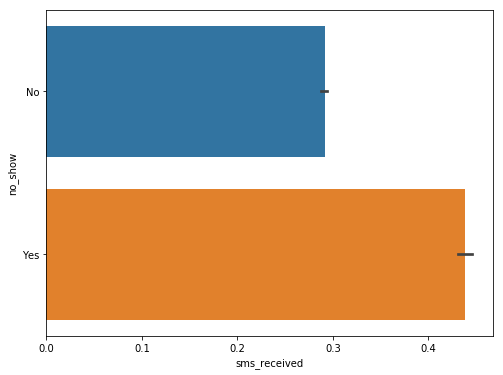

In [97]:
fig = plt.figure(figsize=(8, 6))
s = sns.barplot(x="sms_received", y="no_show", data=raw_data)
plt.show()

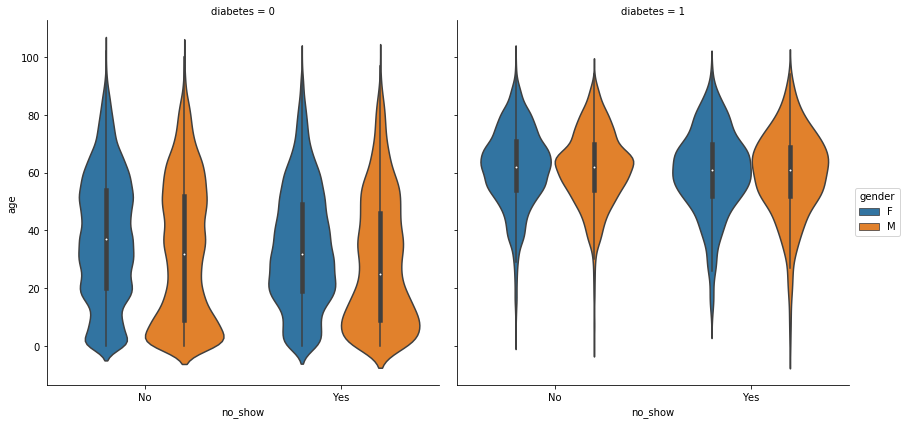

In [120]:
s = sns.factorplot(x="no_show", y="age", hue="gender", col="diabetes", data=raw_data, kind="violin", size=6)
plt.show()

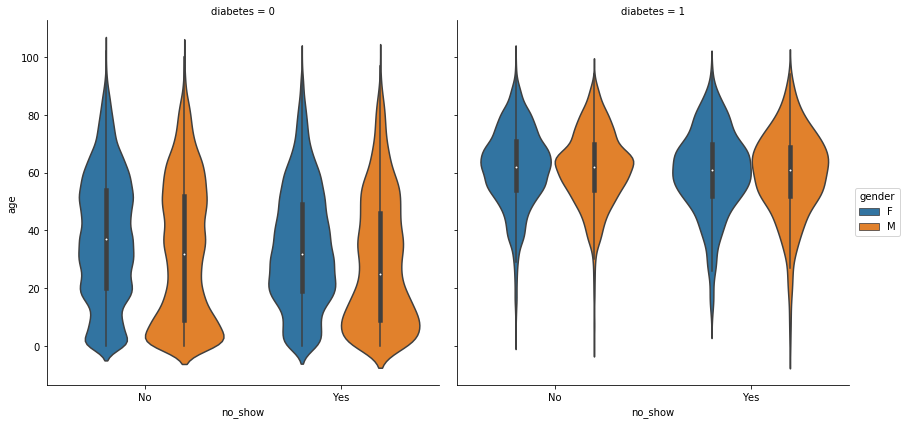

In [113]:
s = sns.factorplot(x="no_show", y="age", hue="gender", col="diabetes", data=raw_data, kind="violin", size=6)
plt.show()

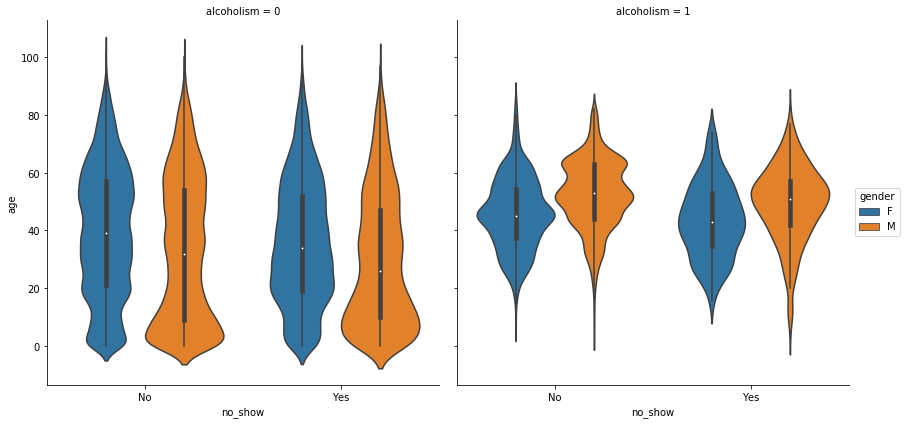

In [114]:
s = sns.factorplot(x="no_show", y="age", hue="gender", col="alcoholism", data=raw_data, kind="violin", size=6)
plt.show()

In [75]:
raw_data.groupby("Neighbourhood")["Age"].mean().sort_values(ascending=False)

Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    54.500000
AEROPORTO                      53.125000
PRAIA DO CANTO                 50.941063
ILHA DO BOI                    48.628571
PARQUE MOSCOSO                 47.486284
FRADINHOS                      45.701550
SANTA LÚCIA                    45.506849
BARRO VERMELHO                 45.040189
JARDIM DA PENHA                44.986588
DE LOURDES                     44.954098
SOLON BORGES                   44.816631
BENTO FERREIRA                 44.613054
VILA RUBIM                     44.413631
JARDIM CAMBURI                 43.731502
MARUÍPE                        42.587277
CENTRO                         42.577984
UNIVERSITÁRIO                  42.039474
MATA DA PRAIA                  41.614907
REPÚBLICA                      41.170060
JUCUTUQUARA                    40.991354
MORADA DE CAMBURI              40.958333
SANTA CECÍLIA                  40.904018
DO QUADRO                      40.315665
SANTA LUÍZA                    39.953271
GO

In [80]:
raw_data.groupby("Neighbourhood")["Scholarship"].sum().sort_values(ascending=False)

Neighbourhood
ILHA DO PRÍNCIPE               579
TABUAZEIRO                     537
RESISTÊNCIA                    468
CARATOÍRA                      456
SANTA MARTHA                   441
GURIGICA                       422
SÃO BENEDITO                   404
BONFIM                         373
SANTO ANDRÉ                    334
ANDORINHAS                     323
SÃO PEDRO                      321
ITARARÉ                        311
NOVA PALESTINA                 310
DA PENHA                       292
JABOUR                         272
JESUS DE NAZARETH              270
SANTOS DUMONT                  235
BELA VISTA                     225
JOANA D´ARC                    219
ILHA DAS CAIEIRAS              203
SANTA TEREZA                   201
CONSOLAÇÃO                     199
SÃO JOSÉ                       180
ROMÃO                          178
SÃO CRISTÓVÃO                  174
CRUZAMENTO                     170
JARDIM CAMBURI                 159
REDENÇÃO                       156
SANTO 